<a href="https://colab.research.google.com/github/muratgguzel/AIML-DeepLearnig-Introduction-Neural-Networks/blob/main/DNN_LEAD_GEN_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))



/bin/bash: nvidia-smi: command not found
Your runtime has 13.6 gigabytes of available RAM



In [4]:
if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')
! pwd

Not using a high-RAM runtime
/content


### Objective

EPAM is willing to dedect past contacts from linked in whom had a period of interaction with EPAM based on different seniority levels.

EPAM willing to increase Leads with reaching out these valuable contacts by using AI functionality.

DATA DICTIONARY

 0    LeadGen

 1   LinkedIn_Profile

 2   LinkedIn_Follower_Count

 3   Linkedin_Connection_Count

 4   Full_Name

 5   Searched_Email

 6   Previous_Seniority_Level

 7   Current_Seniority_Level

 8   Previous_Company

 9   Previous_Company_Size

 10  Previous_Company_Industry_EPAM

 11  Previous_Company_Employess_On_Linkedin

 12  Previous_Company_Followers

 13  Previous_Company_Parent_Cmp_exist

 14  Previous_Company_Forbes

 15  Previous_Company_Average_NPS

 16  Communication_intensity

 17  Engagement_Duration_Epam

 18  Engegement_Cnt_Epam

 19  First_engagement_year

 20  Seniority_Level_Of_Epam

 21  Engegement_Cnt_Epam_C_track

 22  Engegement_Cnt_Epam_C_track_CommIntens

 23  Current_Company

 24  Current_Company_Size

 25  Current_Company_Employess_On_Linkedin

 26  Current_Company_Followers

 27  Current_Company_Tier

 28  Current_Company_Parent_Cmp_exist

 29  Current_Company_Industry_EPAM

 30  Current_Company_Rev

 31  Current_Company_Forbes


## 1-LOADING LIBRARIES

In [1]:
!pip install nb_black

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
!pip install tensorflow

In [6]:
## Install Keras Tuner
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.6 MB/s eta 0:00:00


In [7]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
import sklearn
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

##2-LOADING AND EXPLORING DATA

In [9]:
Row_Data = pd.read_csv("https://raw.githubusercontent.com/SergeyKrupeninEPAM/LeadGenAIEngine/master/Release_4_Generated_test_06-26-2023.csv?token=GHSAT0AAAAAACCSWB7MI2NVGAJQGQGH6R3SZFCUNNA",encoding='utf-8',dtype="str")

In [10]:
# copying data to another variable to avoid any changes to original data
data = Row_Data.copy()

In [11]:
data.columns

Index(['LeadGen', 'LinkedIn_Profile', 'LinkedIn_Follower_Count',
       'Linkedin_Connection_Count', 'Full_Name', 'Searched_Email',
       'Previous_Seniority_Level', 'Current_Seniority_Level',
       'Previous_Company', 'Previous_Company_Size',
       'Previous_Company_Industry_EPAM',
       'Previous_Company_Employess_On_Linkedin', 'Previous_Company_Followers',
       'Previous_Company_Parent_Cmp_exist', 'Previous_Company_Forbes',
       'Previous_Company_Average_NPS', 'Communication_intensity',
       'Engagement_Duration_Epam', 'Engegement_Cnt_Epam',
       'First_engagement_year', 'Seniority_Level_Of_Epam',
       'Engegement_Cnt_Epam_C_track', 'Engegement_Cnt_Epam_C_track_CommIntens',
       'Current_Company', 'Current_Company_Size',
       'Current_Company_Employess_On_Linkedin', 'Current_Company_Followers',
       'Current_Company_Tier', 'Current_Company_Parent_Cmp_exist',
       'Current_Company_Industry_EPAM', 'Current_Company_Rev',
       'Current_Company_Forbes'],
      dty

In [12]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 1356 rows and 32 columns.


In [15]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

Previous_Company_Average_NPS              0.084071
Current_Company_Employess_On_Linkedin     0.046460
Linkedin_Connection_Count                 0.037611
LinkedIn_Follower_Count                   0.036873
Engegement_Cnt_Epam_C_track_CommIntens    0.028024
Engegement_Cnt_Epam_C_track               0.028024
First_engagement_year                     0.028024
Engegement_Cnt_Epam                       0.028024
Engagement_Duration_Epam                  0.028024
Communication_intensity                   0.028024
Current_Company_Industry_EPAM             0.021386
Current_Company_Followers                 0.019174
Current_Company_Rev                       0.016962
Previous_Company_Employess_On_Linkedin    0.015487
Current_Company_Tier                      0.005900
Previous_Company_Followers                0.002212
Previous_Company_Industry_EPAM            0.002212
dtype: float64

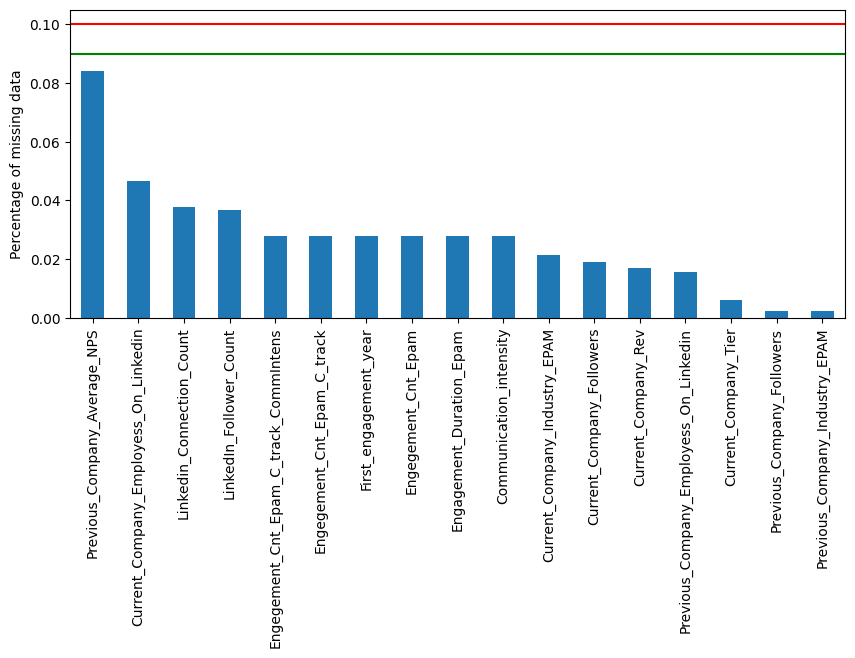

In [16]:
data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.axhline(y=0.09, color='g', linestyle='-')

plt.show()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   LeadGen                                 1356 non-null   object
 1   LinkedIn_Profile                        1356 non-null   object
 2   LinkedIn_Follower_Count                 1306 non-null   object
 3   Linkedin_Connection_Count               1305 non-null   object
 4   Full_Name                               1356 non-null   object
 5   Searched_Email                          1356 non-null   object
 6   Previous_Seniority_Level                1356 non-null   object
 7   Current_Seniority_Level                 1356 non-null   object
 8   Previous_Company                        1356 non-null   object
 9   Previous_Company_Size                   1356 non-null   object
 10  Previous_Company_Industry_EPAM          1353 non-null   object
 11  Prev

In [18]:
data.isnull().sum()

LeadGen                                     0
LinkedIn_Profile                            0
LinkedIn_Follower_Count                    50
Linkedin_Connection_Count                  51
Full_Name                                   0
Searched_Email                              0
Previous_Seniority_Level                    0
Current_Seniority_Level                     0
Previous_Company                            0
Previous_Company_Size                       0
Previous_Company_Industry_EPAM              3
Previous_Company_Employess_On_Linkedin     21
Previous_Company_Followers                  3
Previous_Company_Parent_Cmp_exist           0
Previous_Company_Forbes                     0
Previous_Company_Average_NPS              114
Communication_intensity                    38
Engagement_Duration_Epam                   38
Engegement_Cnt_Epam                        38
First_engagement_year                      38
Seniority_Level_Of_Epam                     0
Engegement_Cnt_Epam_C_track       

In [19]:
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    1084
1     151
2      48
6      31
3      21
7      11
5       6
4       4
dtype: int64

In [20]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

LeadGen                                   0.00
LinkedIn_Profile                          0.00
LinkedIn_Follower_Count                   3.69
Linkedin_Connection_Count                 3.76
Full_Name                                 0.00
Searched_Email                            0.00
Previous_Seniority_Level                  0.00
Current_Seniority_Level                   0.00
Previous_Company                          0.00
Previous_Company_Size                     0.00
Previous_Company_Industry_EPAM            0.22
Previous_Company_Employess_On_Linkedin    1.55
Previous_Company_Followers                0.22
Previous_Company_Parent_Cmp_exist         0.00
Previous_Company_Forbes                   0.00
Previous_Company_Average_NPS              8.41
Communication_intensity                   2.80
Engagement_Duration_Epam                  2.80
Engegement_Cnt_Epam                       2.80
First_engagement_year                     2.80
Seniority_Level_Of_Epam                   0.00
Engegement_Cn

In [21]:
print(data.LeadGen.value_counts())
print(data.LinkedIn_Profile.value_counts())
print(data.LinkedIn_Follower_Count.value_counts())
print(data.Linkedin_Connection_Count.value_counts())
print(data.Full_Name.value_counts())
print(data.Searched_Email.value_counts())
print(data.Previous_Seniority_Level.value_counts())
print(data.Current_Seniority_Level.value_counts())
print(data.Previous_Company.value_counts())
print(data.Previous_Company_Size.value_counts())
print(data.Previous_Company_Industry_EPAM.value_counts())
print(data.Previous_Company_Employess_On_Linkedin.value_counts())
print(data.Previous_Company_Followers.value_counts())
print(data.Previous_Company_Parent_Cmp_exist.value_counts())
print(data.Previous_Company_Forbes.value_counts())
print(data.Previous_Company_Average_NPS.value_counts())
print(data.Communication_intensity.value_counts())
print(data.Engagement_Duration_Epam.value_counts())
print(data.Engegement_Cnt_Epam.value_counts())
print(data.First_engagement_year.value_counts())
print(data.Seniority_Level_Of_Epam.value_counts())
print(data.Engegement_Cnt_Epam_C_track.value_counts())
print(data.Engegement_Cnt_Epam_C_track_CommIntens.value_counts())
print(data.Current_Company.value_counts())
print(data.Current_Company_Size.value_counts())
print(data.Current_Company_Employess_On_Linkedin.value_counts())
print(data.Current_Company_Followers.value_counts())
print(data.Current_Company_Tier.value_counts())
print(data.Current_Company_Parent_Cmp_exist.value_counts())
print(data.Current_Company_Industry_EPAM.value_counts())
print(data.Current_Company_Rev.value_counts())
print(data.Current_Company_Forbes.value_counts())

0    840
1    516
Name: LeadGen, dtype: int64
https://www.linkedin.com/in/bajjarapu                      1
https://www.linkedin.com/in/shakeel-sorathia-62932a6/      1
https://www.linkedin.com/in/melynda-bissmeyer-b8609123/    1
https://www.linkedin.com/in/alexandra-powell-bba29b74/     1
https://www.linkedin.com/in/joseph-h-5196323/              1
                                                          ..
https://www.linkedin.com/in/munishgupta                    1
https://www.linkedin.com/in/rodney-marable-5766b65         1
https://www.linkedin.com/in/tharney                        1
https://www.linkedin.com/in/mgescheidle                    1
https://www.linkedin.com/in/daliya-asuma-7632046/          1
Name: LinkedIn_Profile, Length: 1356, dtype: int64
915.0      6
647.0      5
319.0      5
349.0      5
608.0      5
          ..
1733.0     1
1132.0     1
1717.0     1
2189.0     1
18573.0    1
Name: LinkedIn_Follower_Count, Length: 955, dtype: int64
468.0      6
190.0      5
612.0 

In [22]:
data["LeadGen"]=data["LeadGen"].astype(int)

In [23]:
data["LinkedIn_Follower_Count"]=data["LinkedIn_Follower_Count"].astype(float)

In [24]:
data["Linkedin_Connection_Count"]=data["Linkedin_Connection_Count"].astype(float)

In [25]:
data["Previous_Company_Employess_On_Linkedin"]=data["Previous_Company_Employess_On_Linkedin"].astype(float)

In [26]:
data["Previous_Company_Followers"]=data["Previous_Company_Followers"].astype(float)

In [27]:
data["Previous_Company_Parent_Cmp_exist"]=data["Previous_Company_Parent_Cmp_exist"].astype(int)

In [28]:
data["Current_Company_Employess_On_Linkedin"]=data["Current_Company_Employess_On_Linkedin"].astype(float)

In [29]:
data["Current_Company_Followers"]=data["Current_Company_Followers"].astype(float)

In [30]:
data["Current_Company_Rev"]=data["Current_Company_Rev"].astype(float)

In [31]:
data["Current_Company_Parent_Cmp_exist"]=data["Current_Company_Parent_Cmp_exist"].astype(int)

In [32]:
data["Engegement_Cnt_Epam"]=data["Engegement_Cnt_Epam"].astype(float)

In [33]:
data["Communication_intensity"]=data["Communication_intensity"].astype(float)

In [34]:
data["Engagement_Duration_Epam"]=data["Engagement_Duration_Epam"].astype(float)

In [35]:
data["Engegement_Cnt_Epam_C_track_CommIntens"]=data["Engegement_Cnt_Epam_C_track_CommIntens"].astype(float)

In [36]:
data["Engegement_Cnt_Epam_C_track"]=data["Engegement_Cnt_Epam_C_track"].astype(float)

In [37]:
data["Previous_Company_Forbes"]=data["Previous_Company_Forbes"].astype(int)

In [38]:
data["Current_Company_Forbes"]=data["Current_Company_Forbes"].astype(int)

In [39]:
data["Previous_Company_Average_NPS"]=data["Previous_Company_Average_NPS"].astype(float)

In [40]:
data["First_engagement_year"]=data["First_engagement_year"].astype(float)

In [41]:
num_cols=data.select_dtypes(include=np.number).columns.tolist()

In [42]:
num_cols

['LeadGen',
 'LinkedIn_Follower_Count',
 'Linkedin_Connection_Count',
 'Previous_Company_Employess_On_Linkedin',
 'Previous_Company_Followers',
 'Previous_Company_Parent_Cmp_exist',
 'Previous_Company_Forbes',
 'Previous_Company_Average_NPS',
 'Communication_intensity',
 'Engagement_Duration_Epam',
 'Engegement_Cnt_Epam',
 'First_engagement_year',
 'Engegement_Cnt_Epam_C_track',
 'Engegement_Cnt_Epam_C_track_CommIntens',
 'Current_Company_Employess_On_Linkedin',
 'Current_Company_Followers',
 'Current_Company_Parent_Cmp_exist',
 'Current_Company_Rev',
 'Current_Company_Forbes']

In [62]:
cat_cols = [
"LeadGen",
"Previous_Seniority_Level",
"Current_Seniority_Level",
"Previous_Company_Size",
"Previous_Company_Industry_EPAM",
"Previous_Company_Parent_Cmp_exist",
"Previous_Company_Forbes",
"First_engagement_year",
"Seniority_Level_Of_Epam",
"Current_Company_Size",
"Current_Company_Tier",
"Current_Company_Parent_Cmp_exist",
"Current_Company_Industry_EPAM",
"Current_Company_Forbes",

]
data[cat_cols] = data[cat_cols].astype("category")

##3-DATA PREPROSESSING

In [63]:
data_pre_process=data.copy()

In [64]:
Seniority_Level={"A":3,"B":2,"C":1,"Other":0}

In [65]:

data_pre_process["Previous_Seniority_Level"] = data_pre_process["Previous_Seniority_Level"].map(Seniority_Level)

In [66]:
data_pre_process["Current_Seniority_Level"] = data_pre_process["Current_Seniority_Level"].map(Seniority_Level)

In [67]:
data_pre_process["Seniority_Level_Of_Epam"] = data_pre_process["Seniority_Level_Of_Epam"].map(Seniority_Level)

In [68]:
Size_1=["Other","51-200"]

In [69]:
Size_2=["201-500","501-1000"]

In [70]:
Size_3=["1001-5000","5001-10000","10001+"]

In [71]:
def reduce_company_size(x):
    if x in Size_1:
        return "Size_1"
    elif x in Size_2:
        return "Size_2"
    elif x in Size_3:
        return "Size_3"
    else:
        return x

In [72]:
data_pre_process.Previous_Company_Size=data_pre_process.Previous_Company_Size.apply(reduce_company_size)

In [73]:
data_pre_process.Current_Company_Size=data_pre_process.Current_Company_Size.apply(reduce_company_size)

In [74]:
data_pre_process["Previous_Company_Size"]

0       Size_3
1       Size_3
2       Size_3
3       Size_3
4       Size_3
         ...  
1351    Size_3
1352    Size_3
1353    Size_1
1354    Size_1
1355    Size_3
Name: Previous_Company_Size, Length: 1356, dtype: object

In [75]:
data_pre_process["Current_Company_Size"]

0       Size_3
1       Size_3
2       Size_3
3       Size_3
4       Size_3
         ...  
1351    Size_3
1352    Size_3
1353    Size_2
1354    Size_1
1355    Size_3
Name: Current_Company_Size, Length: 1356, dtype: object

In [76]:
print(data_pre_process.Previous_Seniority_Level.value_counts())

2    546
1    433
3    311
0     66
Name: Previous_Seniority_Level, dtype: int64


In [77]:
print(data_pre_process.Current_Company_Size.value_counts())

Size_3    751
Size_1    326
Size_2    279
Name: Current_Company_Size, dtype: int64


In [78]:
round(data_pre_process.isnull().sum() / data_pre_process.isnull().count() * 100, 2)

LeadGen                                   0.00
LinkedIn_Profile                          0.00
LinkedIn_Follower_Count                   3.69
Linkedin_Connection_Count                 3.76
Full_Name                                 0.00
Searched_Email                            0.00
Previous_Seniority_Level                  0.00
Current_Seniority_Level                   0.00
Previous_Company                          0.00
Previous_Company_Size                     0.00
Previous_Company_Industry_EPAM            0.22
Previous_Company_Employess_On_Linkedin    1.55
Previous_Company_Followers                0.22
Previous_Company_Parent_Cmp_exist         0.00
Previous_Company_Forbes                   0.00
Previous_Company_Average_NPS              8.41
Communication_intensity                   2.80
Engagement_Duration_Epam                  2.80
Engegement_Cnt_Epam                       2.80
First_engagement_year                     2.80
Seniority_Level_Of_Epam                   0.00
Engegement_Cn

In [79]:
data_pre_process["Previous_Company_Industry_EPAM"]

0            FS
1            FS
2            FS
3            FS
4            FS
         ...   
1351    Hi-Tech
1352    Hi-Tech
1353        NaN
1354        NaN
1355      Other
Name: Previous_Company_Industry_EPAM, Length: 1356, dtype: category
Categories (13, object): ['CPG', 'EDU', 'FS', 'HC', ..., 'MFG', 'Oil&Gas/Utilities', 'Other', 'T&H']

In [80]:
def calculate_existence_ratio(data, column):
    value_counts = data[column].value_counts()
    total_count = data[column].count()
    existence_ratio = value_counts / total_count
    return existence_ratio

In [81]:
existence_ratio = calculate_existence_ratio(data_pre_process, "Previous_Company_Industry_EPAM")

In [82]:
existence_ratio

ISV                  0.381375
T&H                  0.176644
CPG                  0.118995
M&E                  0.062823
FS                   0.045824
HC                   0.040650
Hi-Tech              0.036955
MFG                  0.035477
Other                0.035477
LS                   0.033259
EDU                  0.014043
INS                  0.011086
Oil&Gas/Utilities    0.007391
Name: Previous_Company_Industry_EPAM, dtype: float64

In [83]:
existence_ratio = calculate_existence_ratio(data_pre_process, "Current_Company_Industry_EPAM")

In [84]:
existence_ratio

ISV                  0.385833
FS                   0.134891
CPG                  0.076865
HC                   0.068576
Hi-Tech              0.063301
T&H                  0.060286
Other                0.057272
MFG                  0.042200
M&E                  0.032404
LS                   0.029390
INS                  0.028636
EDU                  0.013564
Oil&Gas/Utilities    0.006782
Name: Current_Company_Industry_EPAM, dtype: float64

In [85]:
data_pre_process=data_pre_process.drop(["LinkedIn_Profile"],axis=1)

In [86]:
data_pre_process=data_pre_process.drop(["Full_Name"],axis=1)

In [87]:
data_pre_process=data_pre_process.drop(["Searched_Email"],axis=1)

In [88]:
data_pre_process

,LeadGen,LinkedIn_Follower_Count,Linkedin_Connection_Count,Previous_Seniority_Level,Current_Seniority_Level,Previous_Company,Previous_Company_Size,Previous_Company_Industry_EPAM,Previous_Company_Employess_On_Linkedin,Previous_Company_Followers,Previous_Company_Parent_Cmp_exist,Previous_Company_Forbes,Previous_Company_Average_NPS,Communication_intensity,Engagement_Duration_Epam,Engegement_Cnt_Epam,First_engagement_year,Seniority_Level_Of_Epam,Engegement_Cnt_Epam_C_track,Engegement_Cnt_Epam_C_track_CommIntens,Current_Company,Current_Company_Size,Current_Company_Employess_On_Linkedin,Current_Company_Followers,Current_Company_Tier,Current_Company_Parent_Cmp_exist,Current_Company_Industry_EPAM,Current_Company_Rev,Current_Company_Forbes
0,1,1210.0,1220.0,1,3,Equifax,Size_3,FS,14124.0,173891.0,0,1,8.0,13.0,1.0,2.0,2019.0,1,1.0,3.0,Shopify,Size_3,16747.0,713684.0,TIER 1,0,ISV,4611.9,1
1,1,642.0,629.0,1,1,Equifax,Size_3,FS,14124.0,173891.0,0,1,8.0,402.0,1.0,14.0,2019.0,2,0.0,0.0,Centene Corporation,Size_3,28158.0,196232.0,TIER 1,0,HC,74000.0,0
2,1,810.0,808.0,2,2,Equifax,Size_3,FS,14124.0,173891.0,0,1,8.0,1892.0,2.0,24.0,2020.0,2,0.0,0.0,Floor & Decor,Size_3,5238.0,45063.0,TIER 1,0,CPG,3433.5,0
3,1,3892.0,3899.0,1,1,Equifax,Size_3,FS,14124.0,173891.0,0,1,8.0,132.0,2.0,7.0,2019.0,2,0.0,0.0,Fiserv,Size_3,33430.0,550327.0,TIER 1,0,ISV,10000.0,1
4,0,741.0,738.0,1,1,Equifax,Size_3,FS,14124.0,173891.0,0,1,8.0,176.0,1.0,11.0,2019.0,1,1.0,7.0,WestRock Company,Size_3,24260.0,204857.0,TIER 1,0,MFG,18000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,1,406.0,407.0,3,3,GlobalFoundries,Size_3,Hi-Tech,12750.0,190904.0,0,1,8.0,22.0,1.0,3.0,2018.0,2,0.0,0.0,Maxim Integrated,Size_3,21673.0,311892.0,TIER 1,1,Hi-Tech,12014.0,0
1352,0,1278.0,1009.0,1,1,GlobalFoundries,Size_3,Hi-Tech,12750.0,190904.0,0,1,8.0,67.0,2.0,3.0,2018.0,2,0.0,0.0,Wolfspeed,Size_3,2047.0,79762.0,TIER 2,0,Hi-Tech,746.2,0
1353,0,339.0,339.0,3,3,Hehmeyer,Size_1,NaN,NaN,NaN,0,0,10.0,60.0,3.0,4.0,2020.0,3,0.0,0.0,Apex Fintech Solutions,Size_2,NaN,1930.0,TIER 3,1,INS,99.2,0
1354,0,18573.0,17510.0,1,1,Hehmeyer,Size_1,NaN,NaN,NaN,0,0,10.0,57.0,1.0,3.0,2021.0,2,0.0,0.0,Warwick Capital Management Ltd.,Size_1,7.0,167.0,TIER 3,0,FS,2.0,0


In [89]:
data_pre_process=data_pre_process.drop(["Previous_Company"],axis=1)

In [90]:
data_pre_process=data_pre_process.drop(["Current_Company"],axis=1)

In [91]:
data_pre_process=data_pre_process.drop(["Current_Company_Parent_Cmp_exist"],axis=1)

In [92]:
data_pre_process=data_pre_process.drop(["Previous_Company_Parent_Cmp_exist"],axis=1)

In [93]:
data_pre_process=data_pre_process.drop(["Previous_Company_Followers"],axis=1)

In [94]:
data_pre_process=data_pre_process.drop(["Previous_Company_Employess_On_Linkedin"],axis=1)

In [95]:
data_pre_process=data_pre_process.drop(["Current_Company_Employess_On_Linkedin"],axis=1)

In [96]:
X=data_pre_process.drop(["LeadGen"], axis=1)

In [97]:
y=data_pre_process["LeadGen"]

In [98]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(813, 21) (271, 21) (272, 21)


In [99]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 813
Number of rows in validation data = 271
Number of rows in test data = 272


**3.2** **Imputing Missing Values**

In [100]:
def impute_missing_with_median(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='median')
    data_copy = data.copy()
    data_copy[numeric_columns] = imputer.fit_transform(data_copy[numeric_columns])
    return data_copy

**3.2.1** **Imputing Numerical Values**

In [101]:
round(X_train.isnull().sum() / X_train.isnull().count() * 100, 2)

LinkedIn_Follower_Count                   4.43
Linkedin_Connection_Count                 4.55
Previous_Seniority_Level                  0.00
Current_Seniority_Level                   0.00
Previous_Company_Size                     0.00
Previous_Company_Industry_EPAM            0.12
Previous_Company_Forbes                   0.00
Previous_Company_Average_NPS              9.23
Communication_intensity                   2.09
Engagement_Duration_Epam                  2.09
Engegement_Cnt_Epam                       2.09
First_engagement_year                     2.09
Seniority_Level_Of_Epam                   0.00
Engegement_Cnt_Epam_C_track               2.09
Engegement_Cnt_Epam_C_track_CommIntens    2.09
Current_Company_Size                      0.00
Current_Company_Followers                 1.97
Current_Company_Tier                      0.49
Current_Company_Industry_EPAM             2.09
Current_Company_Rev                       1.60
Current_Company_Forbes                    0.00
dtype: float6

In [102]:
X_train = impute_missing_with_median(X_train)

In [103]:
round(X_train.isnull().sum() / X_train.isnull().count() * 100, 2)

LinkedIn_Follower_Count                   0.00
Linkedin_Connection_Count                 0.00
Previous_Seniority_Level                  0.00
Current_Seniority_Level                   0.00
Previous_Company_Size                     0.00
Previous_Company_Industry_EPAM            0.12
Previous_Company_Forbes                   0.00
Previous_Company_Average_NPS              0.00
Communication_intensity                   0.00
Engagement_Duration_Epam                  0.00
Engegement_Cnt_Epam                       0.00
First_engagement_year                     2.09
Seniority_Level_Of_Epam                   0.00
Engegement_Cnt_Epam_C_track               0.00
Engegement_Cnt_Epam_C_track_CommIntens    0.00
Current_Company_Size                      0.00
Current_Company_Followers                 0.00
Current_Company_Tier                      0.49
Current_Company_Industry_EPAM             2.09
Current_Company_Rev                       0.00
Current_Company_Forbes                    0.00
dtype: float6

In [104]:
X_test = impute_missing_with_median(X_test)

In [105]:
X_val = impute_missing_with_median(X_val)

**4.2.2** **Imputing Categorical Values**

In [106]:
def impute_missing_with_mode(data):
    categorical_columns = data.select_dtypes(include=['category']).columns
    data_copy = data.copy()
    for column in categorical_columns:
        mode = data_copy[column].mode()[0]
        data_copy[column].fillna(mode, inplace=True)
    return data_copy

In [107]:
X_train=impute_missing_with_mode(X_train)

In [108]:
X_test=impute_missing_with_mode(X_test)

In [109]:
X_val=impute_missing_with_mode(X_val)

In [110]:
round(X_train.isnull().sum() / X_train.isnull().count() * 100, 2)

LinkedIn_Follower_Count                   0.0
Linkedin_Connection_Count                 0.0
Previous_Seniority_Level                  0.0
Current_Seniority_Level                   0.0
Previous_Company_Size                     0.0
Previous_Company_Industry_EPAM            0.0
Previous_Company_Forbes                   0.0
Previous_Company_Average_NPS              0.0
Communication_intensity                   0.0
Engagement_Duration_Epam                  0.0
Engegement_Cnt_Epam                       0.0
First_engagement_year                     0.0
Seniority_Level_Of_Epam                   0.0
Engegement_Cnt_Epam_C_track               0.0
Engegement_Cnt_Epam_C_track_CommIntens    0.0
Current_Company_Size                      0.0
Current_Company_Followers                 0.0
Current_Company_Tier                      0.0
Current_Company_Industry_EPAM             0.0
Current_Company_Rev                       0.0
Current_Company_Forbes                    0.0
dtype: float64

In [111]:
round(X_test.isnull().sum() / X_test.isnull().count() * 100, 2)

LinkedIn_Follower_Count                   0.0
Linkedin_Connection_Count                 0.0
Previous_Seniority_Level                  0.0
Current_Seniority_Level                   0.0
Previous_Company_Size                     0.0
Previous_Company_Industry_EPAM            0.0
Previous_Company_Forbes                   0.0
Previous_Company_Average_NPS              0.0
Communication_intensity                   0.0
Engagement_Duration_Epam                  0.0
Engegement_Cnt_Epam                       0.0
First_engagement_year                     0.0
Seniority_Level_Of_Epam                   0.0
Engegement_Cnt_Epam_C_track               0.0
Engegement_Cnt_Epam_C_track_CommIntens    0.0
Current_Company_Size                      0.0
Current_Company_Followers                 0.0
Current_Company_Tier                      0.0
Current_Company_Industry_EPAM             0.0
Current_Company_Rev                       0.0
Current_Company_Forbes                    0.0
dtype: float64

**4.2** **Feature Enginering**

**4.2.1** **Outlier Treatment On Numerical Columns**

In [112]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [113]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [114]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df